In [1]:
! pip install backtesting
!pip install ta
#import pandas_ta as ta
import yfinance as yf
import pandas as pd
import numpy as np
import nsepy as nse
from nsepy import get_history
from nsepy.derivatives import get_expiry_date
from datetime import date
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
nifty_50 = get_history(symbol="NIFTY 50",
                            start=date(2018,1,1),
                            end=date(2022,12,31), 
                            index=True)

nifty_50.drop( [ 'Volume' , 'Turnover'] , axis =1 , inplace = True)
nifty_50



,Open,High,Low,Close
Date,,,,
2018-01-01,10531.70,10537.85,10423.10,10435.55
2018-01-02,10477.55,10495.20,10404.65,10442.20
2018-01-03,10482.65,10503.60,10429.55,10443.20
2018-01-04,10469.40,10513.00,10441.45,10504.80
2018-01-05,10534.25,10566.10,10520.10,10558.85
...,...,...,...,...
2022-12-26,17830.40,18084.10,17774.25,18014.60
2022-12-27,18089.80,18149.25,17967.45,18132.30
2022-12-28,18084.75,18173.10,18068.35,18122.50


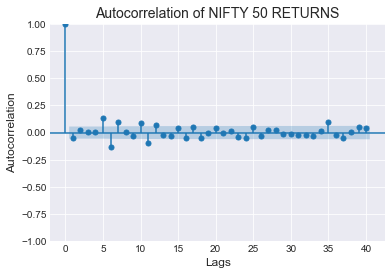

In [3]:
returns = nifty_50.Close.pct_change().dropna()

# Plot ACF of Wheat ETF returns series of past 40 lags
plot_acf(returns, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation of NIFTY 50 RETURNS', fontsize=14)
plt.show()

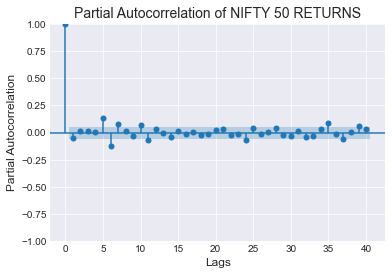

In [4]:
plot_pacf(returns, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.title('Partial Autocorrelation of NIFTY 50 RETURNS', fontsize=14)
plt.show()

In [5]:
i = get_history(symbol="NIFTY",
                        start=date(2022,11,25),
                        end=date(2022,12,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,12,29))
i

,Symbol,Expiry,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Open Interest,Change in OI,Underlying
Date,,,,,,,,,,,,,
2022-11-25,NIFTY,2022-12-29,18631.20,18668.20,18581.15,18646.10,18645.95,18646.10,125828,1.171599e+11,11331150,140950,18512.75
2022-11-28,NIFTY,2022-12-29,18585.00,18742.30,18566.15,18694.10,18690.00,18694.10,122999,1.149600e+11,11940400,609250,18562.75
2022-11-29,NIFTY,2022-12-29,18692.00,18797.65,18670.15,18733.60,18731.00,18733.60,113058,1.060223e+11,12011950,71550,18618.05
2022-11-30,NIFTY,2022-12-29,18736.00,18905.05,18721.20,18874.50,18890.00,18874.50,137806,1.295865e+11,12413300,401350,18758.35
2022-12-01,NIFTY,2022-12-29,18957.70,18998.85,18890.00,18948.30,18945.00,18948.30,144744,1.371678e+11,12378050,-35250,18812.50
2022-12-02,NIFTY,2022-12-29,18948.95,18948.95,18760.05,18812.55,18815.00,18812.55,162318,1.527604e+11,11461950,-916100,18696.10
2022-12-05,NIFTY,2022-12-29,18798.90,18856.40,18710.45,18817.75,18821.25,18817.75,139884,1.313894e+11,11381350,-80600,18701.05
2022-12-06,NIFTY,2022-12-29,18731.30,18790.00,18682.40,18771.35,18770.50,18771.35,134502,1.259986e+11,11070100,-311250,18642.75
2022-12-07,NIFTY,2022-12-29,18680.15,18774.65,18650.40,18670.25,18673.70,18670.25,132092,1.235162e+11,11143600,73500,18560.50


In [6]:
from nsepy.derivatives import get_expiry_date
expiry = get_expiry_date(year=2022, month=12)
expiry

{datetime.date(2022, 12, 1),
 datetime.date(2022, 12, 6),
 datetime.date(2022, 12, 8),
 datetime.date(2022, 12, 13),
 datetime.date(2022, 12, 15),
 datetime.date(2022, 12, 20),
 datetime.date(2022, 12, 22),
 datetime.date(2022, 12, 27),
 datetime.date(2022, 12, 29)}

In [7]:
i1 = get_history(symbol="NIFTY",
                        start=date(2022,1,1),
                        end=date(2022,1,31),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,1,27))
i2 = get_history(symbol="NIFTY",
                        start=date(2022,1,28),
                        end=date(2022,2,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,2,24))
i3 = get_history(symbol="NIFTY",
                        start=date(2022,2,25),
                        end=date(2022,3,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,3,31))
i4 = get_history(symbol="NIFTY",
                        start=date(2022,3,29),
                        end=date(2022,4,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,4,28))
i5 = get_history(symbol="NIFTY",
                        start=date(2022,4,29),
                        end=date(2022,5,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,5,26))
i6 = get_history(symbol="NIFTY",
                        start=date(2022,5,27),
                        end=date(2022,6,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,6,30))
i7 = get_history(symbol="NIFTY",
                        start=date(2022,6,29),
                        end=date(2022,7,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,7,28))
i8 = get_history(symbol="NIFTY",
                        start=date(2022,7,29),
                        end=date(2022,8,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,8,25))
i9 = get_history(symbol="NIFTY",
                        start=date(2022,8,26),
                        end=date(2022,9,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,9,29))
i10 = get_history(symbol="NIFTY",
                        start=date(2022,9,29),
                        end=date(2022,10,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,10,27))
i11 = get_history(symbol="NIFTY",
                        start=date(2022,10,28),
                        end=date(2022,11,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,11,24))
i12 = get_history(symbol="NIFTY",
                        start=date(2022,11,25),
                        end=date(2022,12,28),
                        index=True,
                        futures=True,
                        expiry_date=date(2022,12,29))
e = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12]
index = pd.concat(e)
index.drop(['Last','Settle Price','Number of Contracts','Turnover'] , axis=1 , inplace =True)
index['Prev OI'] = index['Open Interest'].shift(1)
index

,Symbol,Expiry,Open,High,Low,Close,Open Interest,Change in OI,Underlying,Prev OI
Date,,,,,,,,,,
2022-01-03,NIFTY,2022-01-27,17443.00,17692.35,17410.05,17677.95,10631250,356800,17625.70,NaN
2022-01-04,NIFTY,2022-01-27,17730.00,17870.80,17632.40,17846.75,10539100,-92150,17805.25,10631250.0
2022-01-05,NIFTY,2022-01-27,17840.00,17985.00,17786.00,17960.95,10564600,25500,17925.25,10539100.0
2022-01-06,NIFTY,2022-01-27,17830.00,17845.50,17685.65,17788.65,10211200,-353400,17745.90,10564600.0
2022-01-07,NIFTY,2022-01-27,17831.10,17949.00,17736.00,17854.30,10299500,88300,17812.70,10211200.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,NIFTY,2022-12-29,18327.00,18356.90,18112.00,18170.35,9979350,-226750,18127.35,10206100.0
2022-12-23,NIFTY,2022-12-29,18055.05,18115.00,17831.20,17863.90,9849650,-129700,17806.80,9979350.0
2022-12-26,NIFTY,2022-12-29,17890.05,18106.00,17835.55,18027.30,7871600,-1978050,18014.60,9849650.0


In [8]:
index['% OI'] = (index['Change in OI']/ index['Prev OI'])*100
#index['ATR'] = index.ta.atr()
index.drop(['Change in OI','Prev OI'], axis = 1 , inplace =True)
index

,Symbol,Expiry,Open,High,Low,Close,Open Interest,Underlying,% OI
Date,,,,,,,,,
2022-01-03,NIFTY,2022-01-27,17443.00,17692.35,17410.05,17677.95,10631250,17625.70,NaN
2022-01-04,NIFTY,2022-01-27,17730.00,17870.80,17632.40,17846.75,10539100,17805.25,-0.866784
2022-01-05,NIFTY,2022-01-27,17840.00,17985.00,17786.00,17960.95,10564600,17925.25,0.241956
2022-01-06,NIFTY,2022-01-27,17830.00,17845.50,17685.65,17788.65,10211200,17745.90,-3.345134
2022-01-07,NIFTY,2022-01-27,17831.10,17949.00,17736.00,17854.30,10299500,17812.70,0.864737
...,...,...,...,...,...,...,...,...,...
2022-12-22,NIFTY,2022-12-29,18327.00,18356.90,18112.00,18170.35,9979350,18127.35,-2.221711
2022-12-23,NIFTY,2022-12-29,18055.05,18115.00,17831.20,17863.90,9849650,17806.80,-1.299684
2022-12-26,NIFTY,2022-12-29,17890.05,18106.00,17835.55,18027.30,7871600,18014.60,-20.082439


In [9]:
index['P 5 DAY Close'] = index['Close'].shift(5)
index['P 1 DAY Close'] = index['Close'].shift(1)
index['5 DAY %'] = ((index['P 1 DAY Close'] - index['P 5 DAY Close']) / (index['P 5 DAY Close']))*100
index['5 P % OI'] = index['% OI'].rolling(window=5).sum().shift(1)
#index.drop(['P 5 DAY Close','P 1 DAY Close','Open','High','Low'], axis = 1 , inplace =True)
#index['5 P % OI'] = int(index['5 P % OI'])
index.dropna(inplace =True)

index.head(15)



,Symbol,Expiry,Open,High,Low,Close,Open Interest,Underlying,% OI,P 5 DAY Close,P 1 DAY Close,5 DAY %,5 P % OI
Date,,,,,,,,,,,,,
2022-01-11,NIFTY,2022-01-27,18026.65,18121.00,17994.75,18083.55,10011850,18055.75,-5.340960,17846.75,18048.20,1.128777,-0.413347
2022-01-12,NIFTY,2022-01-27,18199.00,18254.90,18165.50,18241.20,10024400,18212.35,0.125351,17960.95,18083.55,0.682592,-4.887523
2022-01-13,NIFTY,2022-01-27,18266.00,18303.40,18197.15,18287.25,10279150,18257.80,2.541299,17788.65,18241.20,2.544038,-5.004127
2022-01-14,NIFTY,2022-01-27,18220.60,18320.00,18146.20,18295.00,10084900,18255.75,-1.889748,17854.30,18287.25,2.424906,0.882306
2022-01-17,NIFTY,2022-01-27,18248.00,18350.00,18234.50,18336.60,10179850,18308.10,0.941507,18048.20,18295.00,1.367449,-1.872179
2022-01-18,NIFTY,2022-01-27,18354.00,18363.50,18100.00,18124.35,9734750,18113.05,-4.372363,18083.55,18336.60,1.399338,-3.622551
2022-01-19,NIFTY,2022-01-27,18094.00,18110.00,17906.55,17974.10,9217500,17938.40,-5.313439,18241.20,18124.35,-0.640583,-2.653953
2022-01-20,NIFTY,2022-01-27,17950.00,17968.70,17694.40,17804.10,8620750,17757.00,-6.474098,18287.25,17974.10,-1.712395,-8.092744
2022-01-21,NIFTY,2022-01-27,17670.05,17723.15,17502.50,17617.80,8362550,17617.15,-2.995099,18295.00,17804.10,-2.683247,-17.108141


In [10]:
index['Position'] = np.where((index['5 DAY %'] > 0) & (index['5 P % OI'] > 0) , 1 , 0 )
index['Position'] = np.where((index['5 DAY %'] < 0) & (index['5 P % OI'] < 0) , -1 , index['Position'] )
#index['Position'].shift(-1)
#index['Position'].value_counts()
def TRADE():
    return index.Position

for i in range (len(index)) :
    print(index['Position'][i])
index.head(15)   

0
0
0
1
0
0
-1
-1
-1
-1
-1
-1
-1
-1
0
0
0
1
0
0
-1
-1
0
0
-1
0
0
0
1
0
-1
-1
-1
-1
-1
-1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
-1
0
-1
1
1
1
1
1
1
1
0
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
0
-1
0
0
-1
-1
-1
0
0
0
-1
-1
-1
-1
0
0
-1
0
-1
-1
0
-1
0
0
0
0
0
-1
0
0
0
0
0
-1
-1
-1
-1
-1
-1
-1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
-1
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
-1
-1
-1
-1
0
-1
0
0
0
1
0
1
1
0
1
0
0
0
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
0
-1
-1
-1
-1
-1
0
0
0
0
0
1
1
0
-1
-1
-1
-1
-1
0
0
0
-1
-1
-1
-1
-1
-1
-1
-1


,Symbol,Expiry,Open,High,Low,Close,Open Interest,Underlying,% OI,P 5 DAY Close,P 1 DAY Close,5 DAY %,5 P % OI,Position
Date,,,,,,,,,,,,,,
2022-01-11,NIFTY,2022-01-27,18026.65,18121.00,17994.75,18083.55,10011850,18055.75,-5.340960,17846.75,18048.20,1.128777,-0.413347,0
2022-01-12,NIFTY,2022-01-27,18199.00,18254.90,18165.50,18241.20,10024400,18212.35,0.125351,17960.95,18083.55,0.682592,-4.887523,0
2022-01-13,NIFTY,2022-01-27,18266.00,18303.40,18197.15,18287.25,10279150,18257.80,2.541299,17788.65,18241.20,2.544038,-5.004127,0
2022-01-14,NIFTY,2022-01-27,18220.60,18320.00,18146.20,18295.00,10084900,18255.75,-1.889748,17854.30,18287.25,2.424906,0.882306,1
2022-01-17,NIFTY,2022-01-27,18248.00,18350.00,18234.50,18336.60,10179850,18308.10,0.941507,18048.20,18295.00,1.367449,-1.872179,0
2022-01-18,NIFTY,2022-01-27,18354.00,18363.50,18100.00,18124.35,9734750,18113.05,-4.372363,18083.55,18336.60,1.399338,-3.622551,0
2022-01-19,NIFTY,2022-01-27,18094.00,18110.00,17906.55,17974.10,9217500,17938.40,-5.313439,18241.20,18124.35,-0.640583,-2.653953,-1
2022-01-20,NIFTY,2022-01-27,17950.00,17968.70,17694.40,17804.10,8620750,17757.00,-6.474098,18287.25,17974.10,-1.712395,-8.092744,-1
2022-01-21,NIFTY,2022-01-27,17670.05,17723.15,17502.50,17617.80,8362550,17617.15,-2.995099,18295.00,17804.10,-2.683247,-17.108141,-1


<AxesSubplot:xlabel='Date'>

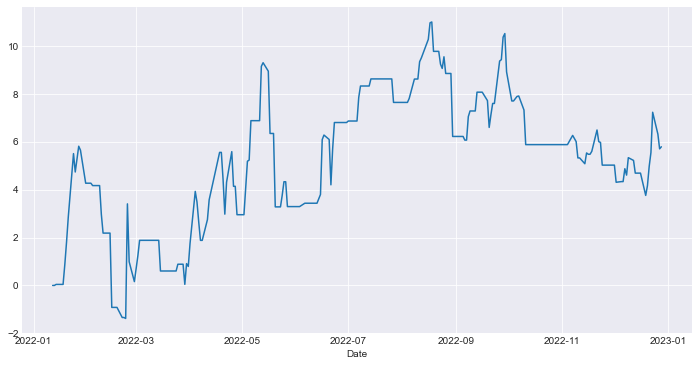

In [11]:
index['%Return'] = (index['Close'].pct_change())*100
index['Stat Ret'] = index['%Return']*index['Position']
t = index['Stat Ret'].cumsum()
t.plot(figsize=(12, 6))





In [19]:

from backtesting import Backtest, Strategy
#from backtesting import crossover

#from backtesting.test import SMA, GOOG


class Corellation_Strat(Strategy):
    def init(self):
        super().init()
        #price = self.index.Close
        self.signal1 = self.I(TRADE)

    def next(self):
        super().next()
        #slatr = self.data.ATR[-1]
        if self.signal1==1  :
            sl1 = self.data.Close[-1] - 100
            tp1 = self.data.Close[-1] + 200
            self.buy(sl=sl1 , tp=tp1)
        elif self.signal1==-1 :
            sl1 = self.data.Close[-1] + 100
            tp1 = self.data.Close[-1] - 200
            self.sell(sl=sl1 , tp=tp1)


bt = Backtest(index, Corellation_Strat, cash = 100, commission=.002,
              exclusive_orders=True)
stat = bt.run()
stat
bt.plot()

Row(id='1756', ...)

In [ ]:
# SIGNAL()